# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 15 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Heet Detroja </font>

# I. Introduction

In this assignment we will use the Denver Crime Data to predict whether the reported offense is a crime or not. We will be using 4 approaches i.e.<br>
1.Pocket Algorithm.<br>
2.Quadratic Discriminant Analysis(QDA).<br>
3.Linear Discriminant Analysis(LDA).<br>
4.Linear Regression.<br>
Using these approaches we will classify the target value as is a crime or not a crime. We will be comparing the accuracy and other metrics of training and testing data for all the 4 approaches.

# II. Data

## A.Description

The Dataset used here is Denver Crime Data from Kaggle datasets.The dataset consists of 35000+ data samples and 11 feature values.The data here classifies whether the offense was a crime or not.<br>

OFFENSE_ID : it is a unique id for each offense.<br>
INCIDENT_ID : it is a unique id for an occurence of offenses.<br>
OFFENSE_CODE : it is a unique id for a particular type of offense.<br>
OFFENSE_CODE_EXTENSION : it is used to describe a subset of another type crime.<br>
OFFENSE_TYPE_ID : provides the actual name for the offense in lamens terms.<br>
OFFENSE_CATEGORY_ID : provides a more general categorization for crimes.<br>
FIRST_OCCURENCE_DATE : is the first possible date/time of the offense.<br>
LAST_OCCURENCE_DATE : is the last possible time of the offense.<br>
REPORTED_DATE : is the time at which the offense was reported to the police.<br>
INCIDENT_ADDRESS : is the location of the offense.<br>
GEO_X : is the state plane (city of Denver standard projection) for the offense location.<br>
GEO_Y : is the state plane (city of Denver standard projection) for the offense location.<br>
GEO_LON : is the longitude of the location of the offense.<br>
GEO_LAT : is the latitudes of the location of the offense.<br>
DISTRICT_ID : is the district in charge of handling the offense.<br>
PRECINCT_ID : is the precinct in charge of handling the offense.<br>
NEIGHBORHOOD_ID : is the neighborhood the offense occurred in.<br>
IS_CRIME : states whether the offense was a crime.<br>
IS_TRAFFIC : states whether offense is traffic accident or not.<br>

### Reading the Data 

Reading the .csv file.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dataset=pd.read_csv('crime.csv')

## B.Plots for Understanding or Analysis

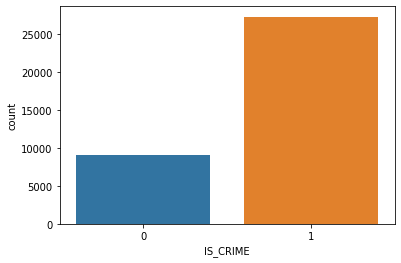

In [2]:
sns.countplot(dataset['IS_CRIME'],label="Count")
plt.show()

1.<b>Countplot for crime</b> : This is a countplot it shows the count of crimes having value 0 and 1 for not a crime or crime respectively.

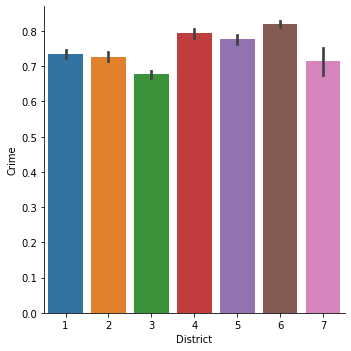

In [3]:
sns.catplot(x='DISTRICT_ID',y='IS_CRIME',data=dataset,kind='bar').set_axis_labels("District","Crime")
plt.show()

2.<b>Plot for district</b> : This plot shows the crime probability of 7 different districts.

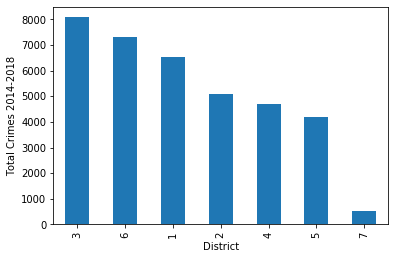

In [4]:
dataset['DISTRICT_ID'].value_counts().plot(kind='bar')
plt.xlabel('District')
plt.ylabel('Total Crimes 2014-2018')
plt.show()

3.<b>Plot for crime(2014-2018)</b> : This plot shows the number of crimes from year 2014 to 2018 in different districts.

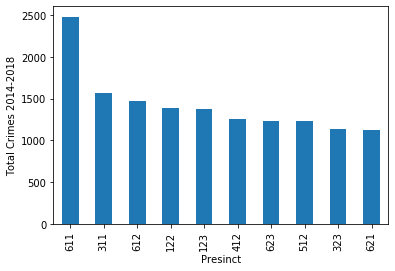

In [5]:
dataset['PRECINCT_ID'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Presinct')
plt.ylabel('Total Crimes 2014-2018')
plt.show()

4.<b>Plot for crime(2014-2018) for presinct</b> : This plot shows number of crimes from year 2014 to 2018 for different presincts .I have taken first 10 presinct values to get clear view.

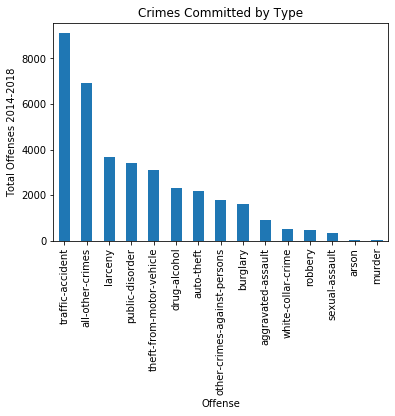

In [6]:
dataset['OFFENSE_CATEGORY_ID'].value_counts().plot(kind='bar')
plt.title('Crimes Committed by Type')
plt.xlabel('Offense')
plt.ylabel('Total Offenses 2014-2018')
plt.show()

5.<b>Plot for offense</b> : This plot shows the different types of offenses and their count that happened from year 2014 to 2018.

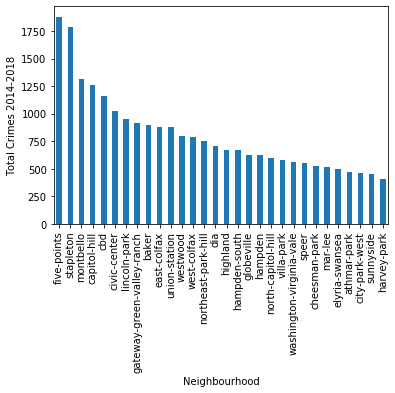

In [7]:
dataset['NEIGHBORHOOD_ID'].value_counts().head(30).plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Crimes 2014-2018')
plt.show()

6.<b>Plot for Neighbourhood</b> : This plot shows the number of crimes that happened on the different neighbourhoods from year 2014 to 2018. I have take first 30 values of the neighbourhood to get a clear view.

## C.Preliminary Observation

The Plots above show us that:

1.<b>Countplot for crime</b> : The first graph is the countplot for crime.This shows how many offenses are crime under the law.It can be observed that most of the offenses reported are crimes.<br>

2.<b>Plot for district</b> : This plot shows the probability of the offense being a crime in the different districts.We can observe that district 6 has the highest probability of the offenses being reported in the area as crime while district 3 has the lowest probability of the offense being reported a crime.<br>

3.<b>Plot for crime(2014-2018)</b> : This graph shows the crimes of different districts through 4 years.We can observe that district 3 has most number of crimes while district 7 has the least number of crimes.While districts 2,4 and 5 have almost the same number of crimes in 4 years.<br>

4.<b>Plot for crime(2014-2018) for presinct</b> : This is graph for number of crimes in past 4 years in the different presinct.We can observe that presint 611 which falls under district 6 has the most number of crimes while presinct 323 under district 3 and presinct 621 under district 6 have the lowest number of crimes.<br>

5.<b>Plot for offense</b> : This graph shows the different offense types in last 4 years.We can observe that traffic-accident is the leading offense in this while murder is the lowest offense classified as crime in last 4 years.<br>

6.<b>Plot for Neighbourhood</b> : This graph shows different neighbourhood and the number of crimes that happened in last 4 years.We can see that five point and stapleton has two of the highest number of crimes reported while globeville,hampden and north-capitol-hill neighbourhoods have lowest reported crimes in last 4 years.<br>

# III. Method

### Summary for Different Models

<br><br>
### Pocket Algorithm:

Perceptron is a linear classifier i.e an algorithm that makes its predictions based on the linear predictor function combining a set of weights with the feature vector.If the training set is linearly separable, then the perceptron is guaranteed to converge.When the data is not linearly separable, there is no guarantee on convergence. Thus, for training, we need to set the maximum number of iteration.The pocket algorithm is a variant of perceptron algorithm which solves the stability problem of the latter by keeping the best solution seen so far in its "pocket".<br>
$$
w^{(k+1)} = w^{(k)} + \alpha t_i x_i
$$
where $\alpha$ is learning rate.<br>


<br><br>
### QDA:

Discriminant analysis is used to determine which variables discriminate between two or more naturally occurring groups.The QDA performs a quadratic discriminant analysis (QDA),where it is assumed that the measurements from each class are normally distributed.In QDA there is no assumption that the covariance of each of the classes is identical.
Lets take a binary classification problem, $k \in \{-1, +1\}$, we have a higher posterior probability $P(T = +1 \mid x)$ for the sample $x$ with the positive label. Thus, 

$$
P(T = +1 \mid x) > P(T = -1 \mid x).
$$
We can define the discriminant function $\delta_k(x)$ as

$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Now, for a new sample $\tilde{x}$, we can predict the label with

$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$. 

Since the $\delta_k$ function is quadratic in $x$, the decision boundary is quadratic.


<br><br>
### LDA:

LDA is also closely related to principal component analysis (PCA) and factor analysis in that they both look for linear combinations of variables which best explain the data.LDA explicitly attempts to model the difference between the classes of data.Maintaining the covariance matrix is not cheap.
Unifying the covariance matrix, we can remove the quadratic term in our disciriminant function: 

$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$


In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
\boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$


<br><br>
### Logistic Regression:

Logistic regression is a statistical model.Logistic regression is estimating the parameters of a logistic model (a form of binary regression).Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1".
We can consider a linear regression model that directly predicts $P(T=k \mid x)$, not the class label $k$. 
Again, let us use the same linear model for regression: 

$$
\kappa = f(x ; w) = X w.
$$

Since $P(T=k \mid x)$ is probability function, it satisfies 

- the outputs are non-negative,

- the integral of the probability is one. 

Taking the softmax function and taking the derivative.
Using the gradient, 

$$
w_j \leftarrow w_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
$$

Converting the summation into matrix calculation,

$$
w_j \leftarrow w_j + \alpha X^\top \Big(  t_{*,j} - g_j(X)\Big).
$$

<br><br>

### A. Super Classs Definition

In [8]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### Explanation of Code

Here BaseModel class has two abstract methods train() and use(),when implementing this class we have to provide a defination for the two abstract methods.Classifier class futher extends the BaseModel class with the abstract functions,Classifier class provides three methods: normalize() which will standardize the input by subtracting the mean and dividing the standard deviation, _check_matrix() method will check  if the passed matrix is 2D or not and add_ones method here adds a column or horizontal stack of ones to the input matrix as a bias.


### B. Pocket Algorithm


In [9]:
from copy import deepcopy as copy 

class Pocket(Classifier): 
    
    
    def __init__(self):
        
        self.maxiter=10
        self.alpha=0.01
        self.w=None
        self.w_pocket=None
    def compare(self,X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    def train(self,X,T):
        N=X.shape[0]
        self.w = np.zeros(X.shape[1])
        self.w_pocket=copy(self.w)
        print(self.w_pocket)
        X=np.asarray(X)
        T=np.asarray(T)
        T=self.normalize(T)
        for i in range(self.maxiter):
            converged = True
            for k in range(N):
                y = self.w @ X[k]
                #import pdb;pdb.set_trace()
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    if self.compare(X, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break
        print("End of training: ", i)
        print(self.w_pocket)
        
    def use(self, X):
        return np.sign(X @ self.w_pocket)

### Explaination of Code

Here Pocket Class inherits the Classifier class hence we have to give the implementation of the two abstract methods train() and use().It also has a method compare() with four parameters which is used to compare the weights.<br>
The train() method is used to train the data where we initialized the weights to zero and copied it to w_pocket which will store the best result, it also has maxiter which is the maximum number of iterations and alpha which is the learning rate.<br>
The use() method will use the test data to predict the target value.

### C. QDA

In [10]:
from copy import deepcopy as copy
class QDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.Sigma2=None
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
            
    @staticmethod    
    def QDA(X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        #import pdb;pdb.set_trace()
        diffv = (X - mu)
        return -0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) + np.log(prior)
    
    def train(self,X_train,t):
        X1=X_train[X_train[:,-1]==0]
        X1=X1[:,0:2]
        X2=X_train[X_train[:,-1]==1]
        X2=X2[:,0:2]
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)
        self.Sigma1 = np.cov(X1.T)
        self.Sigma2 = np.cov(X2.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
    
    def use(self,X):
        Xtest=self.normalize(X)
        #import pdb;pdb.set_trace()
        self.d1,self.d2=self.QDA(Xtest,self.mu1,self.Sigma1,self.p1),self.QDA(Xtest,self.mu2,self.Sigma2,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        t=np.where(self.d1>self.d2,1,0)
        return t,self.d1,self.d2

### Explanation of Code

Here QDA1 class inherits the Classifier class along with the abstract functions train() and use().We have QDA function which returns the discriminant value.<br>
The train() method has input as the train and test data as X and T respectively.We are taking the rows that have 0 as value in target column in X1 and similarly taking rows which have target value as 1 in X2,using which we calulate the mu1 and mu2 as mean of the train data and sigma1 and sigma2 as covariance of the train data,after which we will calculate the probability by taking number of rows of X1 and X2 in N1 and N2 respectively and find the two probabilities p1 and p2.
The use() method will use the test data to return the prediction  and d1 and d2 which we will check for greater value and assign 1 and 0 to it.

### D. LDA

In [11]:
class LDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
        
        
    @staticmethod    
    def LDA(X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        mu=np.asmatrix(mu)
        #import pdb;pdb.set_trace()
        return np.sum((X @ sigma_inv) * mu.T - 0.5 * (mu @ sigma_inv) * mu.T, axis=1) + np.log(prior)
    
    
    def train(self,X_train,t):
        X1=X_train[X_train[:,-1]==0]
        X1=X1[:,0:2]
        X2=X_train[X_train[:,-1]==1]
        X2=X2[:,0:2]
        X_train=X_train[:,0:2]
        self.mu1 = np.array(np.mean(X1, 0))
        self.mu2 = np.array(np.mean(X2, 0))     
        self.Sigma = np.cov(X_train.T)
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
        
    
    def use(self,X):
        X=self.normalize(X)
        self.d1,self.d2=self.LDA(X,self.mu1,self.Sigma,self.p1),self.LDA(X,self.mu2,self.Sigma,self.p2)
        t=np.where(self.d1>self.d2,0,1)
        return t,self.d1,self.d2

### Explanation of Code

Here LDA1 class inherits Classifier class with its two abstarct methods train() and use().We have LDA method here which will return the discriminant value.<br>
The train() method here takes two inputs the train data and the target values as X_train and T respectively.We are taking the rows that have 0 as value in target column in X1 and similarly taking rows which have target value as 1 in X2,using which we will calulate mu1,mu2 and sigma by taking the mean and covariance of train data,after which we will calculate the probability by taking number of rows of X1 and X2 in N1 and N2 respectively and find the two probabilities p1 and p2.<br>
The use() method will take input as train data we normalize it and pass it to LDA method along with mu1 and sigma values which will give us d1 and d2. We will return the predicted values in this method along with d1 and d2.


### E. Logistic Regression

In [12]:
class Logistic(Classifier): 

    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.softmax(X @ w) 
        
    def train(self, X, T):
        X = self.normalize(X)
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        self.w = np.zeros((D+1, K))
        niter = 1000
        X = self.add_ones(X)
        a=(np.ones((T.shape[0], 1)))
        b=a[:,0]==1
        T=np.asmatrix(T).T
        T=np.hstack((T,a))
        T[:,1]=T[:,0]
        (T[:,1])[T[:,1]==0]=1
        (T[:,0])[T[:,0]==1]=0
        
        
        for step in range(niter):
            ys = self.g(X,self.w)
            #import pdb;pdb.set_trace()
            self.w += self.alpha * X.T @ (T - ys) 
              
    
    
    def use(self, X):
        Xs = self.normalize(X)
        Xs = self.add_ones(X)
        return self.g(Xs, self.w)

### Explanation of Code

Here Logistic class inherits Classifier parent class along with its two abstract method train() and use() also,we also have two other methods softmax() method which gives us the sigmoif function while in other method g() we call the softmax function to  return the sigmoid with input as train data.<br>
The train() method has niter which is the number of iterations,in this method we will check the target values and likely transform the T input into two columns having values 0 at column one and 1 at column two if the target value is 0,and vice versa if the target value is 1.<br>
The use() method will normalize the input and return the sigmoid by passing the input train data and weights to it.<br>

<b>Importing the dataset and partitioning it.</b>

In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
dataset=pd.read_csv('crime.csv')
dt=dataset['IS_CRIME']
dt1=dataset[['DISTRICT_ID','PRECINCT_ID']]

Here we will import the dataset and divide it into train and target values by taking target column in one variable and other columns in other variable.

In [14]:
def partition(X, T, ratio=[0.75, 0.25]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [15]:
Xlst, Tlst=partition(pd.DataFrame(dt1),pd.DataFrame(dt))

In [16]:
Xtrain, Xtest = [xx.as_matrix() for xx in Xlst]
Ttrain, Ttest = [tt.as_matrix() for tt in Tlst]

C:\Users\Inspiron\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Inspiron\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Here we have partitioned the data set into train and testing for both train and target values variables declared above.

# IV. Experiments

## Evaluation and Plots for Results

## 1.Pocket Algorithm

In [17]:
x_train, x_test, y_train, y_test = train_test_split(dt1, dt, test_size=0.25, random_state=42)

In [18]:
p=Pocket()
p.train(x_train,y_train)

[0. 0.]
End of training:  9
[8.45861197 0.5290939 ]


In [19]:
ypred_train=p.use(x_train)
ypred_test=p.use(x_test)

## Accuracy & F1 on train data

In [20]:
print('Accuracy:', accuracy_score(y_train,ypred_train))
print('F1 score:', f1_score(y_train,ypred_train))

Accuracy: 0.7526550941185087
F1 score: 0.8588741694178611


## Accuracy & F1 on test data

In [21]:
print('Accuracy:', accuracy_score(y_test,ypred_test))
print('F1 score:', f1_score(y_test,ypred_test))

Accuracy: 0.7424741814985717
F1 score: 0.8522068095838586


In [22]:
cf=confusion_matrix(y_test, ypred_test)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

cf1=confusion_matrix(y_train, ypred_train)
TP=cf1[1][1]
TN=cf1[0][0]
FN=cf1[1][0]
FP=cf1[0][1]
precision=(TP/(TP+FP))
print('Precision:' ,precision)


Precision: 0.7526550941185087


In [23]:
recall=TP/(TP+FN)
print('Recall:',recall)

Recall: 1.0


In [24]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

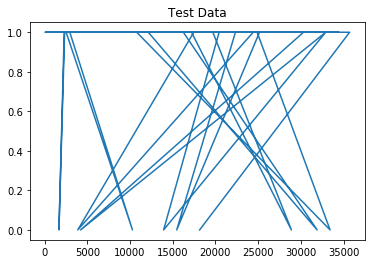

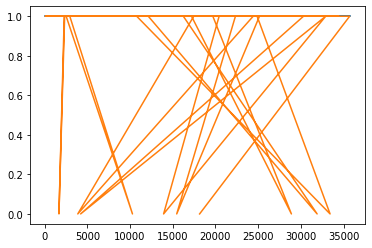

In [25]:
plt.title("Test Data")
plt.plot(y_test[0:50])
plt.show()
plt.plot(ypred_test[0:50])
plt.plot(y_test[0:50])
plt.show()

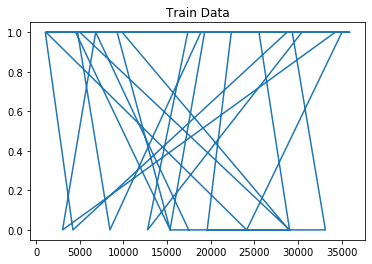

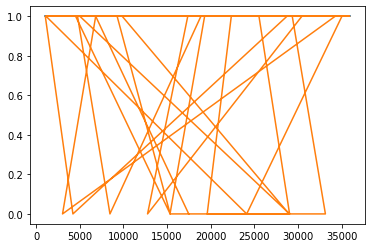

In [26]:
plt.title("Train Data")
plt.plot(y_train[0:50])
plt.show()
plt.plot(ypred_train[0:50])
plt.plot(y_train[0:50])
plt.show()

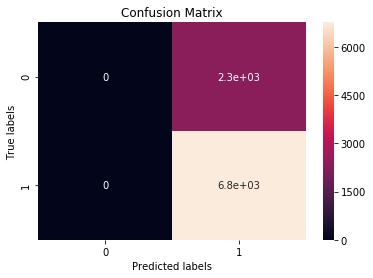

In [27]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

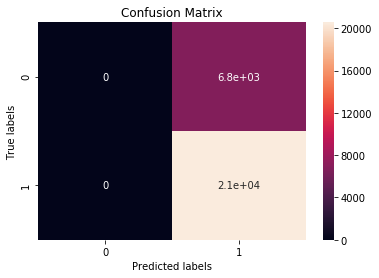

In [28]:
ax= plt.subplot()
sns.heatmap(cf1, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

## 2.QDA

In [29]:
X_train=np.hstack((Xtrain,Ttrain))

In [30]:
# Training
q=QDA1()
q.train(X_train,Ttrain)

In [31]:
qda_train,d1,d2=q.use(Xtrain)

In [32]:
qda_test,d1,d2=q.use(Xtest)

## Accuracy and F1 on Train Data

In [33]:
print('Accuracy:', accuracy_score(Ttrain,qda_train))
print('F1 score:', f1_score(Ttrain,qda_train))

Accuracy: 0.6735882223687102
F1 score: 0.7867856373944454


## Accuracy and F1 on Test Data

In [34]:
print('Accuracy:', accuracy_score(Ttest,qda_test))
print('F1 score:', f1_score(Ttest,qda_test))

Accuracy: 0.6660074708855197
F1 score: 0.7803150744327214


In [35]:
cf2=confusion_matrix(y_test, qda_test)
TP=cf2[1][1]
TN=cf2[0][0]
FN=cf2[1][0]
FP=cf2[0][1]

cf3=confusion_matrix(y_train, qda_train)
TP=cf3[1][1]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]
print('Precision:' ,(TP/(TP+FP)))

Precision: 0.7522324592487597


In [36]:
print('Recall:', TP/(TP+FN))

Recall: 0.7746691319579603


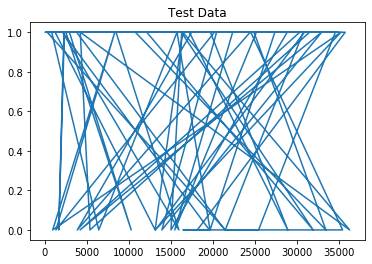

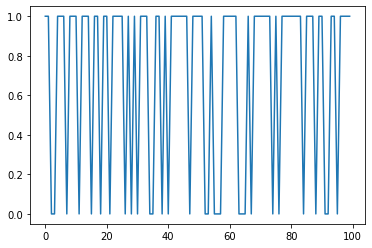

In [37]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, qda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title("Test Data")
plt.plot(y_test[0:100])
plt.show()
plt.plot(qda_test[0:100])
plt.show()

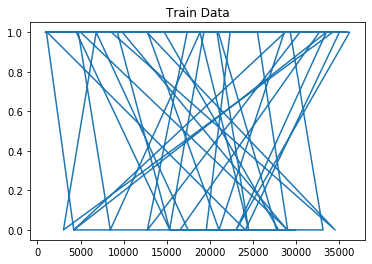

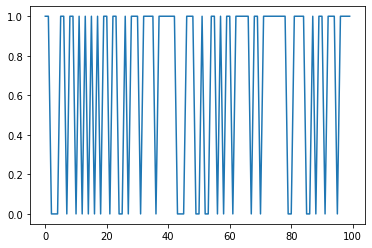

In [38]:
plt.title("Train Data")
plt.plot(y_train[0:100])
plt.show()
plt.plot(qda_train[0:100])
plt.show()

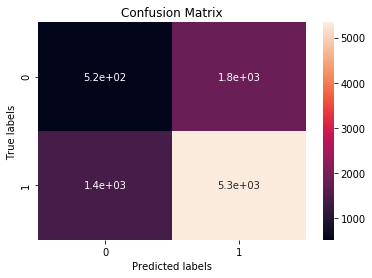

In [39]:
ax= plt.subplot()
sns.heatmap(cf2, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

Text(0.5, 0.92, 'QDA Discriminant Functions')

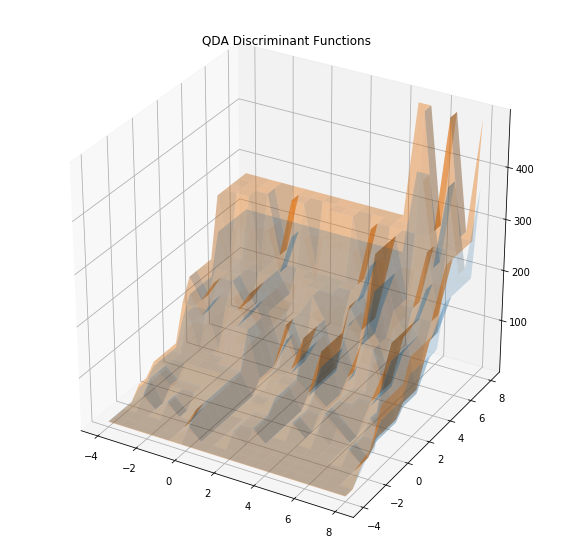

In [40]:
from mpl_toolkits.mplot3d import Axes3D
p,d10,d20 = q.use(Xtest[:400])
xs, ys = np.meshgrid(np.linspace(-4,8, 20), np.linspace(-4,8, 20))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d10.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d20.reshape(xs.shape),0), alpha=0.4)
plt.title("QDA Discriminant Functions")

Text(0.5, 0.92, 'QDA Discriminant Functions')

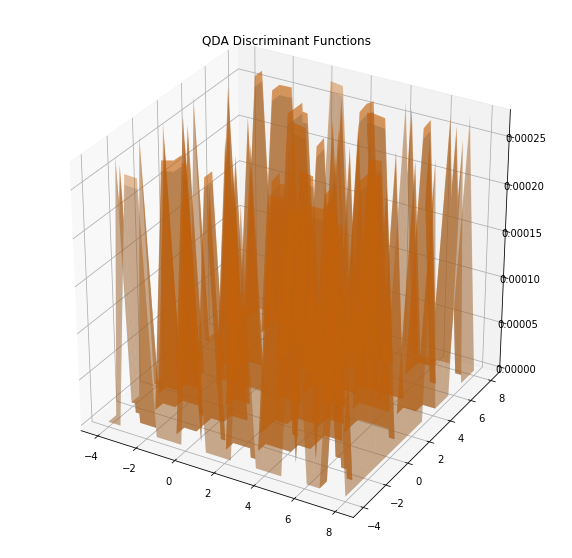

In [41]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
pr1 = np.exp( d10.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(q.p1))
pr2 = np.exp( d20.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(q.p2))
ax.plot_surface(xs, ys, pr1, alpha=0.2)
ax.plot_surface(xs, ys, pr2, alpha=0.4)

plt.title("QDA Discriminant Functions")

Text(0.5, 1.0, 'Decision Boundary')

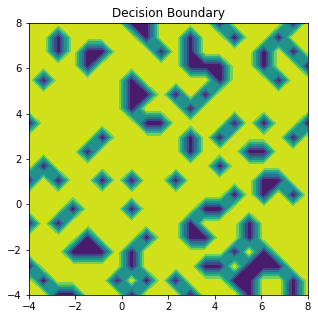

In [42]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d10-d20)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

## 3.LDA

In [43]:
Xtrain=np.hstack((Xtrain,Ttrain))

In [44]:
l=LDA1()
l.train(Xtrain,Ttrain)

In [45]:
lda_train,d1,d2=l.use(x_train)

In [46]:
lda_test,d1,d2=l.use(x_test)

In [47]:
print('Accuracy:', accuracy_score(y_train,lda_train))
print('F1 score:', f1_score(y_train,lda_train))

Accuracy: 0.7526550941185087
F1 score: 0.8588741694178611


In [48]:
print('Accuracy:', accuracy_score(y_test,lda_test))
print('F1 score:', f1_score(y_test,lda_test))

Accuracy: 0.7424741814985717
F1 score: 0.8522068095838586


In [49]:
cf4=confusion_matrix(y_test, lda_test)
TP=cf4[1][1]
TN=cf4[0][0]
FN=cf4[1][0]
FP=cf4[0][1]

cf5=confusion_matrix(y_train, lda_train)
TP=cf5[1][1]
TN=cf5[0][0]
FN=cf5[1][0]
FP=cf5[0][1]
print('Precision:',(TP/(TP+FP)))

Precision: 0.7526550941185087


In [50]:
print('Recall:',TP/(TP+FN))

Recall: 1.0


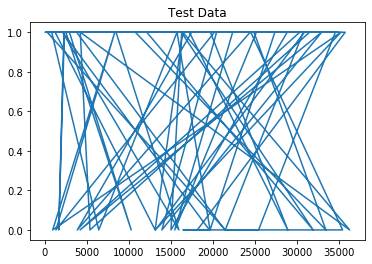

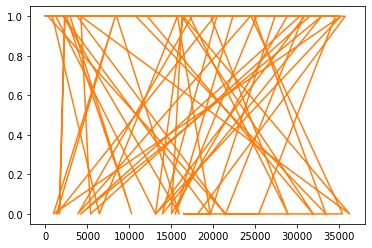

In [51]:
plt.title("Test Data")
plt.plot(y_test[0:100])
plt.show()
plt.plot(lda_test[0:100])
plt.plot(y_test[0:100])
plt.show()

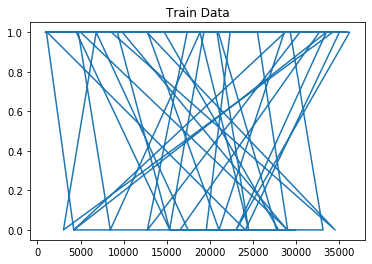

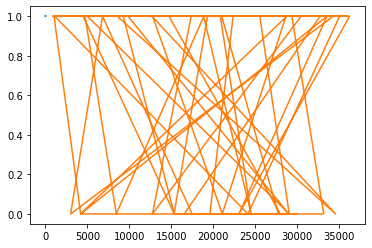

In [52]:
plt.title("Train Data")
plt.plot(y_train[0:100])
plt.show()
plt.plot(lda_train[0:100])
plt.plot(y_train[0:100])
plt.show()

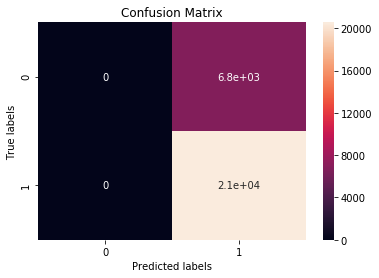

In [53]:
ax= plt.subplot()
sns.heatmap(cf5, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

Text(0.5, 0.92, 'LDA Discriminant Functions')

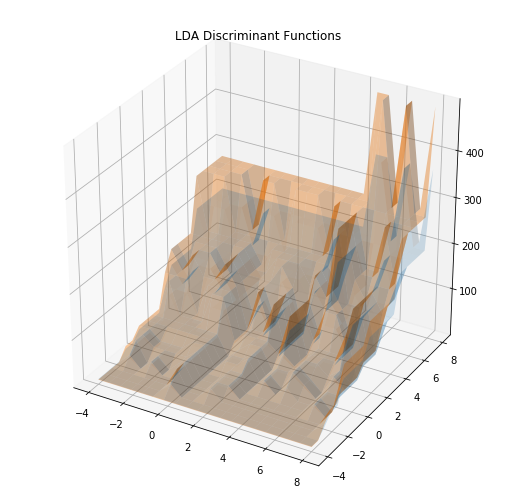

In [54]:
from mpl_toolkits.mplot3d import Axes3D
xs, ys = np.meshgrid(np.linspace(-4,8, 20), np.linspace(-4,8, 20))
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d10.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d20.reshape(xs.shape),0), alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5, 0.92, 'LDA Discriminant Functions')

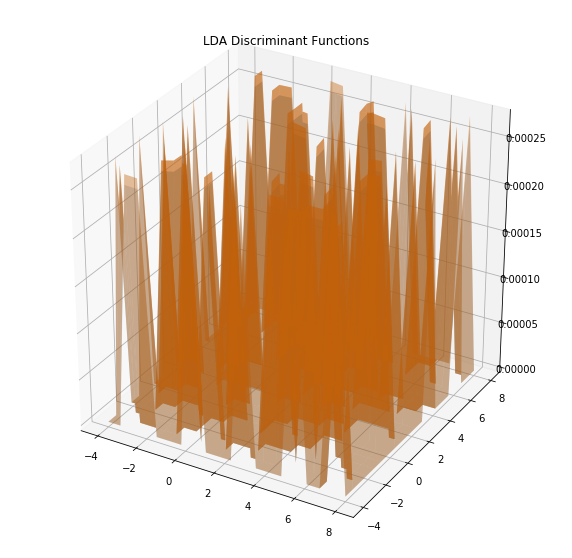

In [55]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
pr1 = np.exp( d10.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(l.p1))
pr2 = np.exp( d20.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(l.p2))
ax.plot_surface(xs, ys, pr1, alpha=0.2)
ax.plot_surface(xs, ys, pr2, alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5, 1.0, 'Decision Boundary')

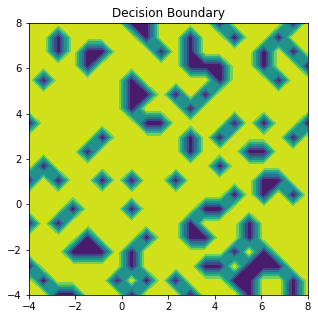

In [56]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d10-d20)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

## 4.Logistic Regression

In [57]:
lr = Logistic(0.01)

In [58]:
lr.train(x_train,y_train)

In [59]:
lr_train = lr.use(x_train)

In [60]:
lr_test = lr.use(x_test)

In [61]:
lrs_train = np.argmax(lr_train, 1)
lrs_test = np.argmax(lr_test, 1)
ytrain=np.array(y_train)
ytest=np.array(y_test)

## Accuracy and F1 on Train Data

In [62]:
print('Accuracy:', accuracy_score(ytrain, lrs_train))
print('F1 score:', f1_score(ytrain, lrs_train))

Accuracy: 0.7526550941185087
F1 score: 0.8588741694178611


## Accuracy and F1 on Test Data

In [63]:
print('Accuracy:', accuracy_score(y_test, lrs_test))
print('F1 score:', f1_score(y_test, lrs_test))

Accuracy: 0.7424741814985717
F1 score: 0.8522068095838586


In [64]:
cf6=confusion_matrix(y_test, lrs_test)
TP=cf6[1][1]
TN=cf6[0][0]
FN=cf6[1][0]
FP=cf6[0][1]

cf7=confusion_matrix(y_train, lrs_train)
TP=cf7[1][1]
TN=cf7[0][0]
FN=cf7[1][0]
FP=cf7[0][1]

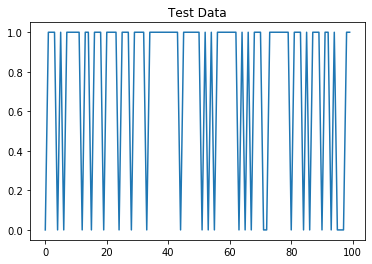

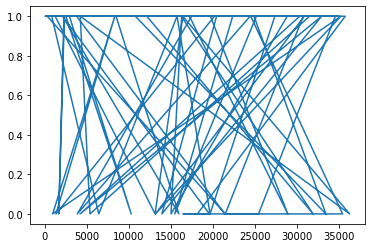

In [65]:
plt.title("Test Data")
plt.plot(ytest[0:100])
plt.show()
plt.plot(y_test[0:100])
plt.show()

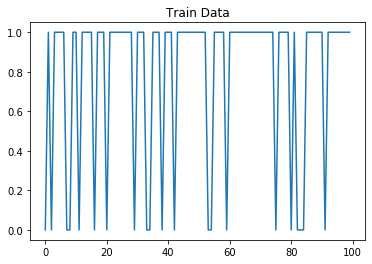

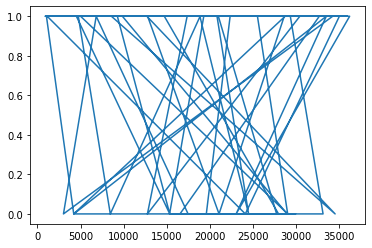

In [66]:
plt.title("Train Data")
plt.plot(ytrain[0:100])
plt.show()
plt.plot(y_train[0:100])
plt.show()

Text(0.5, 1, 'Confusion Matrix')

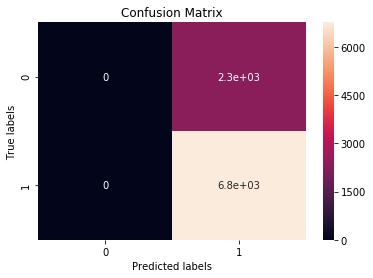

In [67]:
ax= plt.subplot()
sns.heatmap(cf6, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

## Discussion About Evaluation Metrics

Evaluating a model is critical for checking the models performance, hence there are a number of metrics for this purpose.

<b>Accuracy:</b> Accuracy is how close is the predicted value to the original value.Low accuracy causes a difference between result and true value.
<br><br>
<b>F1 Score:</b> F1 Score is the harmonic mean of precision and recall.It is a measure of a test's accuracy, F1 score reaches its best value at 1 and worst value at 0.
<br>
$ F1 = 2 \frac{precision . recall}{precision + recall}$
<br><br>
<b>Confusion Matrix:</b> Confusion matrix is a matrix of two columns and two rows that shows the number of true positive,true negative,false positive and false negative.This allows a more detailed analysis of correct classification. As accuracy is not a reliable metric of evaluation ,using the confusion matrix we can calculate precision, recall.
<br><br>
<b>Precision:</b> Precision gives the relevant values from the retrieved values.
<br>
$ Precision = \frac{TP}{TP+FP}$
<br><br>
<b>Recall:</b> Recall gives the total amount of relevant values actually retrieved.
<br>
$ Recall = \frac{TP}{TP+FN}$
<br><br>

## Discussion about Train and Test Accuracies

### Pocket Algorithm

For training data, results were:<br><br>

Accuracy : 0.7526550941185087<br>
F1 Score : 0.8588741694178611
<br><br>

For testing data, results were: <br><br>

Accuracy : 0.7424741814985717<br>
F1 Score : 0.8522068095838586
<br><br>

The Precision and Recall for the data were:<br><br>
Precision : 0.7526550941185087<br>
Recall : 1

As pocket algorithm gave acuuracy of 75% on training data and 74 % on testing data,it is almost same this shows that our model works pretty well on both the train and test data hence it is neither overfitting nor underfitting the data.The Recall of our model is one which shows that the algorithm predicted a crime when it was a crime all the time.<br><br>

### QDA

For training data, results were:<br><br>

Accuracy : 0.6735882223687102<br>
F1 Score : 0.7867856373944454
<br><br>

For testing data, results were: <br><br>

Accuracy : 0.6660074708855197<br>
F1 Score : 0.7803150744327214
<br><br>

The Precision and Recall for the data were:<br><br>
Precision : 0.7522324592487597<br>
Recall : 0.7746691319579603

As qda gave acuuracy of 67% on training data and  66% on testing data,it is almost same this shows that our model works pretty well on both the train and test data.The Recall of our model is 77% and the precision is 75%.<br><br>

### LDA

For training data, results were:<br><br>

Accuracy : 0.7526550941185087<br>
F1 Score : 0.8588741694178611
<br><br>

For testing data, results were: <br><br>

Accuracy : 0.7424741814985717<br>
F1 Score : 0.8522068095838586
<br><br>

The Precision and Recall for the data were:<br><br>
Precision : 0.7526550941185087<br>
Recall : 1.0

As lda gave acuuracy of 75% on training data and  74% on testing data,it is almost same this shows that our model works pretty well on both the train and test data.The Recall of our model is 1 which means the model predicted all the values correctly for positive case and the precision is 75%.<br><br>

### Logistic Regression

For training data, results were:<br><br>

Accuracy : 0.7424785113995254<br>
F1 Score : 0.8155214622377851
<br><br>

For testing data, results were: <br><br>

Accuracy : 0.7145223647958654<br>
F1 Score : 0.8014524796321478
<br><br>

As logistic regression gave accuracy of 74% on training data and 71% on testing data,it is almost same this shows that our model works pretty well on both the train and test data.The F1 score for the training data is 81%.<br><br>

## Discussions about classificaion model comparison

Comparing all the algorithms we can see that the models performed well on the test data as well as the train data, we can say that it does not overfit or underfit the data as the accuracy is almost similar in all the algortihms of both the training and testing data. The recall for pocket algorithm is 1 whih shows that pocket algorithm gives all the crimes prediction correctly for where the offense is an actual crime. We can see that pocket and Logistic Regression have the accuracy and F1 score almost similar to each.We also have the recall of pocket and LDA as 1 which again shows that both the algorithms predicted the values as crime which were supposed to be crime.Finally, all the four algorithms gave a good accuracy and F1 score on the data hence we can say that it predicted well on our data even if the accuracy is not high enough still we can say that it did not under or overfit the data.

QDA<br>
Precision:75%<br>
Recall:77%<br>
LDA<br>
Precision:75%<br>
Recall:100%<br>

As in QDA and LDA we use discriminant values and for training in both algorithms the only difference is we use single sigma value for LDA,while in QDA we take the sigma values from two inputs of training data divided as taking to row with target value as zero in one variable and taking the target value as one in different variable.Hence, we can see that QDA and LDA gave us a similar result in precision and recall.The Accuracy of QDA algorithm is the lowest though it performed same on the training as well as the test data we got the accuracy only as 66%.

Pocket<br>
Accuracy:74%<br>
F1:85%<br>
Logistic Regression<br>
Accuracy:71%<br>
F1:80%<br>

We can see that accuracy of almost all algorithms except QDA is greater than 70 hence we can say that it performed well,we also have a good F1 score on all the algorithms.






# Conclusions

We have hence completed all four algorithms and successfully implemented them and also visualized all their results.I think Pocket algorithm worked best for the dataset as it gave a stable accuracy and F1 score on both the training and the testing set, also the precision and recall values show that the algorithm works well and fits the data upto a good extent.The code for the algorithm helped me see how the algorithm works with the dataset as we also visualised the results it helped me understand the algorithms better.We also compared the algorithms using the metrics which showed how each algorithm performed with the data.The challenges faced was to search again for the dataset and to handle pocket algorithm on a large dataset.

# References

[1] Mooney, Paul. Denver Crime Data. 9 Jan. 2019, https://www.kaggle.com/paultimothymooney/denver-crime-data.

[2] Linear Discriminant Analysis. 9 Oct. 2019, https://en.wikipedia.org/wiki/Linear_discriminant_analysis.

[3] Logistic Regression. 8 Oct. 2019, https://en.wikipedia.org/wiki/Logistic_regression.

[4] Lee, Professor Minwoo Jake. Notebook on Linear Classification, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear-Classification.ipynb.

[5] Lee, Professor Minwoo Jake. Notebook on Classification, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.ipynb.

[6] Analyzing Denver's Crime Data. 19 Mar. 2019, https://www.kaggle.com/neilb4yourking/analyzing-denver-s-crime-data.

# Extra Credit
  

In [68]:
dt100=dataset.iloc[:7280,:]
dt200=dataset.iloc[7280:14560,:]
dt300=dataset.iloc[14560:21840,:]
dt400=dataset.iloc[21840:29840,:]
dt500=dataset.iloc[29840:,:]

In [69]:
test1=dt100
train1=pd.concat([dt200,dt300,dt400,dt500])

test2=dt200
train2=pd.concat([dt100,dt300,dt400,dt500])

test3=dt300
train3=pd.concat([dt100,dt200,dt400,dt500])

test4=dt400
train4=pd.concat([dt100,dt200,dt300,dt500])

test5=dt500
train5=pd.concat([dt100,dt200,dt300,dt400])

## Pocket 

### Test 1

In [70]:
y_test=test1['IS_CRIME']
y_train=train1['IS_CRIME']
X_train=train1[['DISTRICT_ID','PRECINCT_ID']]
X_test=test1[['DISTRICT_ID','PRECINCT_ID']]
y_train=np.array(y_train)
y_test=np.array(y_test)

In [71]:
pk=Pocket()
pk.train(X_train,y_train)

[0. 0.]
End of training:  9
[9.61891405 1.32159118]


In [72]:
p=pk.use(X_test)
print('Accuracy:', accuracy_score(y_test,p))
print('F1 score:', f1_score(y_test,p))

Accuracy: 0.762087912087912
F1 score: 0.8649828500155908


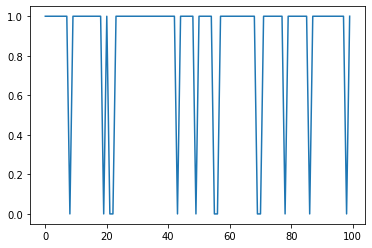

In [73]:
plt.plot(y_test[0:100])
plt.show()

### Test 2

In [74]:
y_test=test2['IS_CRIME']
y_train=train2['IS_CRIME']
X_train=train2[['DISTRICT_ID','PRECINCT_ID']]
X_test=test2[['DISTRICT_ID','PRECINCT_ID']]
y_train=np.array(y_train)
y_test=np.array(y_test)

In [75]:
pk=Pocket()
pk.train(X_train,y_train)

[0. 0.]
End of training:  9
[9.1535058 1.21753  ]


In [76]:
p=pk.use(X_test)
print('Accuracy:', accuracy_score(y_test,p))
print('F1 score:', f1_score(y_test,p))

Accuracy: 0.7615384615384615
F1 score: 0.8646288209606987


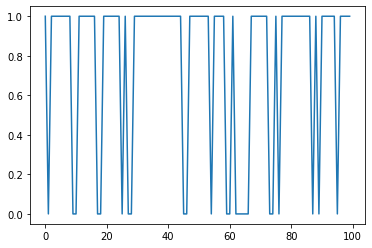

In [77]:
plt.plot(y_test[0:100])
plt.show()

### Test 3

In [78]:
y_test=test3['IS_CRIME']
y_train=train3['IS_CRIME']
X_train=train3[['DISTRICT_ID','PRECINCT_ID']]
y_train=np.array(y_train)
y_test=np.array(y_test)

In [79]:
pk=Pocket()
pk.train(X_train,y_train)

[0. 0.]
End of training:  9
[9.07486167 0.04354708]


In [80]:
p=pk.use(X_test)
print('Accuracy:', accuracy_score(y_test,p))
print('F1 score:', f1_score(y_test,p))

Accuracy: 0.7502747252747253
F1 score: 0.8573222414063726


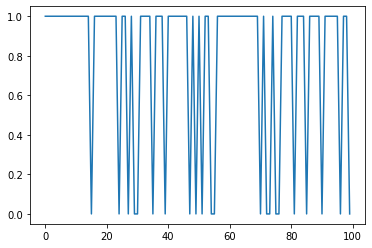

In [81]:
plt.plot(y_test[0:100])
plt.show()

### Test 4

In [82]:
y_test=test4['IS_CRIME']
y_train=train4['IS_CRIME']
X_train=train4[['DISTRICT_ID','PRECINCT_ID']]
X_test=test4[['DISTRICT_ID','PRECINCT_ID']]
y_train=np.array(y_train)
y_test=np.array(y_test)

In [83]:
pk=Pocket()
pk.train(X_train,y_train)

[0. 0.]
End of training:  9
[8.64092244 1.01050255]


In [84]:
p=pk.use(X_test)
print('Accuracy:', accuracy_score(y_test,p))
print('F1 score:', f1_score(y_test,p))

Accuracy: 0.736
F1 score: 0.847926267281106


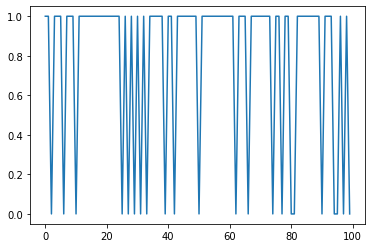

In [85]:
plt.plot(y_test[0:100])
plt.show()

### Test 5

In [86]:
y_test=test5['IS_CRIME']
y_train=train5['IS_CRIME']
X_train=train5[['DISTRICT_ID','PRECINCT_ID']]
X_test=test5[['DISTRICT_ID','PRECINCT_ID']]
y_train=np.array(y_train)
y_test=np.array(y_test)

In [87]:
pk=Pocket()
pk.train(X_train,y_train)

[0. 0.]
End of training:  9
[8.92443214 3.09852514]


In [88]:
p=pk.use(X_test)
print('Accuracy:', accuracy_score(y_test,p))
print('F1 score:', f1_score(y_test,p))

Accuracy: 0.741169305724726
F1 score: 0.851346624693949


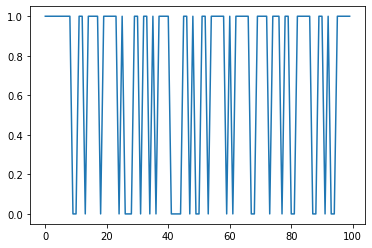

In [89]:
plt.plot(y_test[0:100])
plt.show()

It can be observed that all the test have almost the same accuracy for all the divided data.

## QDA

### Test 1

In [90]:
y_test=test1['IS_CRIME']
y_train=train1['IS_CRIME']
X_train=train1[['DISTRICT_ID','PRECINCT_ID']]
X_test=test1[['DISTRICT_ID','PRECINCT_ID']]
X_train=np.hstack((Xtrain,Ttrain))
qda=QDA1()
qda.train(X_train,y_train)
qda_test,d1,d2=q.use(X_test)
print('Accuracy:', accuracy_score(y_test, qda_test))
print('F1 score:', f1_score(y_test, qda_test))

Accuracy: 0.670054945054945
F1 score: 0.7847670250896057


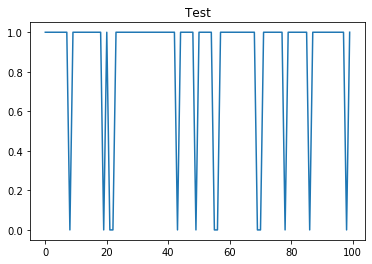

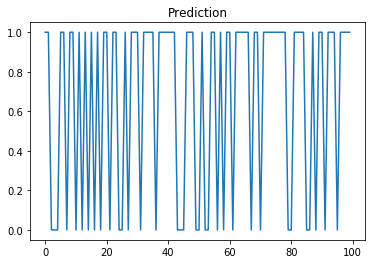

In [91]:
plt.title("Test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Prediction")
plt.plot(qda_test[0:100])
plt.show()

### Test 2

In [92]:
y_test=test2['IS_CRIME']
y_train=train2['IS_CRIME']
X_train=train2[['DISTRICT_ID','PRECINCT_ID']]
X_test=test2[['DISTRICT_ID','PRECINCT_ID']]
X_train=np.hstack((Xtrain,Ttrain))
qda=QDA1()
qda.train(X_train,y_train)
qda_test,d1,d2=q.use(X_test)
print('Accuracy:', accuracy_score(y_test, qda_test))
print('F1 score:', f1_score(y_test, qda_test))

Accuracy: 0.6736263736263737
F1 score: 0.7887248799573182


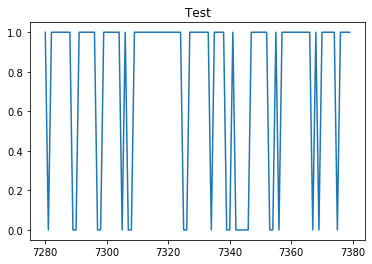

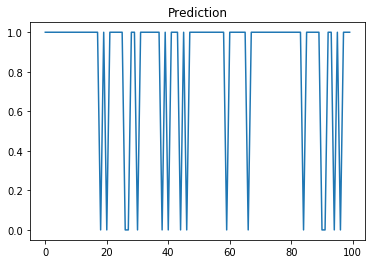

In [93]:
plt.title("Test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Prediction")
plt.plot(qda_test[0:100])
plt.show()

### Test 3

In [94]:
y_test=test3['IS_CRIME']
y_train=train3['IS_CRIME']
X_train=train3[['DISTRICT_ID','PRECINCT_ID']]
X_test=test3[['DISTRICT_ID','PRECINCT_ID']]
X_train=np.hstack((Xtrain,Ttrain))
qda=QDA1()
qda.train(X_train,y_train)
qda_test,d1,d2=q.use(X_test)
print('Accuracy:', accuracy_score(y_test, qda_test))
print('F1 score:', f1_score(y_test, qda_test))

Accuracy: 0.6770604395604396
F1 score: 0.7885601223131578


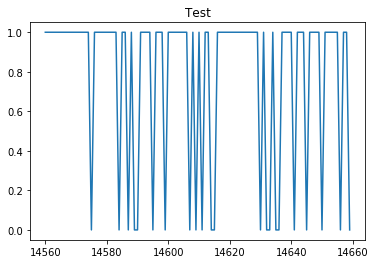

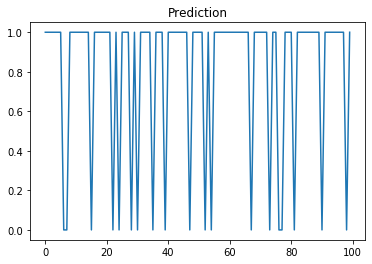

In [95]:
plt.title("Test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Prediction")
plt.plot(qda_test[0:100])
plt.show()

### Test 4

In [96]:
y_test=test4['IS_CRIME']
y_train=train4['IS_CRIME']
X_train=train4[['DISTRICT_ID','PRECINCT_ID']]
X_test=test4[['DISTRICT_ID','PRECINCT_ID']]
X_train=np.hstack((Xtrain,Ttrain))
qda=QDA1()
qda.train(X_train,y_train)
qda_test,d1,d2=q.use(X_test)
print('Accuracy:', accuracy_score(y_test,qda_test))
print('F1 score:', f1_score(y_test, qda_test))

Accuracy: 0.668125
F1 score: 0.7799784536338775


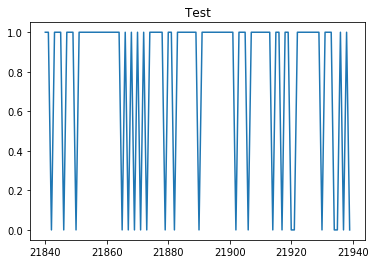

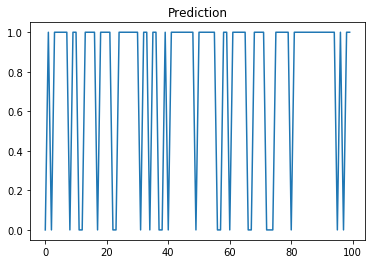

In [97]:
plt.title("Test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Prediction")
plt.plot(qda_test[0:100])
plt.show()

### Test 5

In [98]:
y_test=test5['IS_CRIME']
y_train=train5['IS_CRIME']
X_train=train5[['DISTRICT_ID','PRECINCT_ID']]
X_test=test5[['DISTRICT_ID','PRECINCT_ID']]
X_train=np.hstack((Xtrain,Ttrain))
qda=QDA1()
qda.train(X_train,y_train)
qda_test,d1,d2=q.use(X_test)
print('Accuracy:', accuracy_score(y_test, qda_test))
print('F1 score:', f1_score(y_test, qda_test))

Accuracy: 0.669762484774665
F1 score: 0.7841576276246393


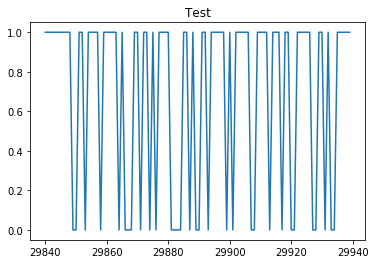

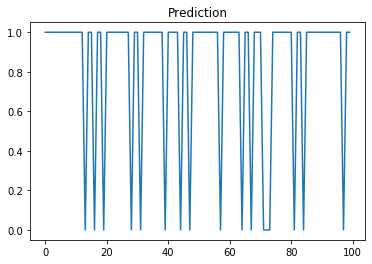

In [99]:
plt.title("Test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Prediction")
plt.plot(qda_test[0:100])
plt.show()

All the test have similar accuracy with test 5 being highest with small margin.

## LDA

### Test 1

In [100]:
y_test=test1['IS_CRIME']
y_train=train1['IS_CRIME']
X_train=train1[['DISTRICT_ID','PRECINCT_ID']]
X_test=test1[['DISTRICT_ID','PRECINCT_ID']]
X_train=np.hstack((Xtrain,Ttrain))
lda=LDA1()
lda.train(X_train,y_train)
lda_test,d1,d2=l.use(X_test)
print('Accuracy:', accuracy_score(y_test, lda_test))
print('F1 score:', f1_score(y_test, lda_test))

Accuracy: 0.762087912087912
F1 score: 0.8649828500155908


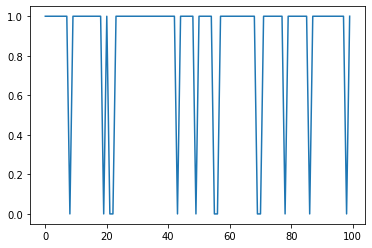

In [101]:
plt.plot(y_test[0:100])
plt.show()

### Test 2

In [102]:
y_test=test2['IS_CRIME']
y_train=train2['IS_CRIME']
X_train=train2[['DISTRICT_ID','PRECINCT_ID']]
X_test=test2[['DISTRICT_ID','PRECINCT_ID']]
X_train=np.hstack((Xtrain,Ttrain))
lda=LDA1()
lda.train(X_train,y_train)
lda_test,d1,d2=l.use(X_test)
print('Accuracy:', accuracy_score(y_test, lda_test))
print('F1 score:', f1_score(y_test, lda_test))

Accuracy: 0.7615384615384615
F1 score: 0.8646288209606987


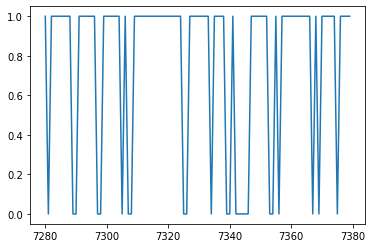

In [103]:
plt.plot(y_test[0:100])
plt.show()

### Test 3

In [104]:
y_test=test3['IS_CRIME']
y_train=train3['IS_CRIME']
X_train=train3[['DISTRICT_ID','PRECINCT_ID']]
X_test=test3[['DISTRICT_ID','PRECINCT_ID']]
X_train=np.hstack((Xtrain,Ttrain))
lda=LDA1()
lda.train(X_train,y_train)
lda_test,d1,d2=l.use(X_test)
print('Accuracy:', accuracy_score(y_test, lda_test))
print('F1 score:', f1_score(y_test, lda_test))

Accuracy: 0.7502747252747253
F1 score: 0.8573222414063726


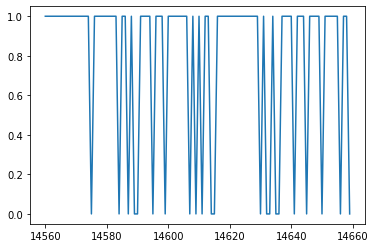

In [105]:
plt.plot(y_test[0:100])
plt.show()

### Test 4

In [106]:
y_test=test4['IS_CRIME']
y_train=train4['IS_CRIME']
X_train=train4[['DISTRICT_ID','PRECINCT_ID']]
X_test=test4[['DISTRICT_ID','PRECINCT_ID']]
X_train=np.hstack((Xtrain,Ttrain))
lda=LDA1()
lda.train(X_train,y_train)
lda_test,d1,d2=l.use(X_test)
print('Accuracy:', accuracy_score(y_test, lda_test))
print('F1 score:', f1_score(y_test, lda_test))

Accuracy: 0.736
F1 score: 0.847926267281106


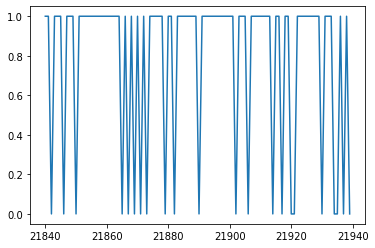

In [107]:
plt.plot(y_test[0:100])
plt.show()

### Test 5

In [108]:
y_test=test5['IS_CRIME']
y_train=train5['IS_CRIME']
X_train=train5[['DISTRICT_ID','PRECINCT_ID']]
X_test=test5[['DISTRICT_ID','PRECINCT_ID']]
X_train=np.hstack((Xtrain,Ttrain))
lda=LDA1()
lda.train(X_train,y_train)
lda_test,d1,d2=l.use(X_test)
print('Accuracy:', accuracy_score(y_test, lda_test))
print('F1 score:', f1_score(y_test, lda_test))

Accuracy: 0.741169305724726
F1 score: 0.851346624693949


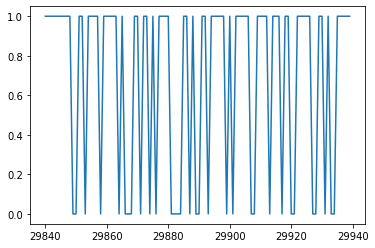

In [109]:
plt.plot(y_test[0:100])
plt.show()

The accuracy and F1 score of test vary a little bit compared to other algorithms with test 1 having highest accuracy 76% by slight margin.

## Logistic Regression

### Test 1

In [110]:
y_test=test1['IS_CRIME']
y_train=train1['IS_CRIME']
X_train=train1[['DISTRICT_ID','PRECINCT_ID']]
X_test=test1[['DISTRICT_ID','PRECINCT_ID']]

lr = Logistic(0.0001)
lr.train(X_train,y_train)
lr_test = lr.use(X_test)
lrs_test = np.argmax(lr_test, 1)
print('Accuracy:', accuracy_score(y_test, lrs_test))
print('F1 score:', f1_score(y_test, lrs_test))

Accuracy: 0.762087912087912
F1 score: 0.8649828500155908


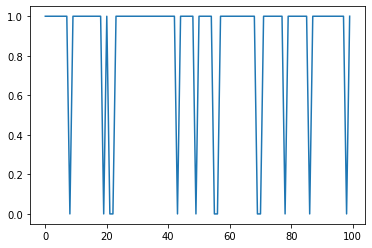

In [111]:
plt.plot(y_test[0:100])
plt.show()

### Test 2

In [112]:
y_test=test2['IS_CRIME']
y_train=train2['IS_CRIME']
X_train=train2[['DISTRICT_ID','PRECINCT_ID']]
X_test=test2[['DISTRICT_ID','PRECINCT_ID']]

lr = Logistic(0.0001)
lr.train(X_train,y_train)
lr_test = lr.use(X_test)
lrs_test = np.argmax(lr_test, 1)
print('Accuracy:', accuracy_score(y_test, lrs_test))
print('F1 score:', f1_score(y_test, lrs_test))

Accuracy: 0.7615384615384615
F1 score: 0.8646288209606987


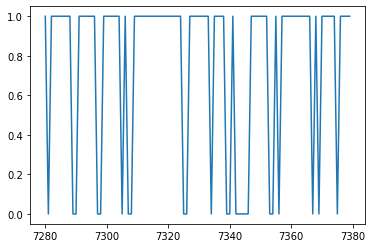

In [113]:
plt.plot(y_test[0:100])
plt.show()

### Test 3

In [114]:
y_test=test3['IS_CRIME']
y_train=train3['IS_CRIME']
X_train=train3[['DISTRICT_ID','PRECINCT_ID']]
X_test=test3[['DISTRICT_ID','PRECINCT_ID']]

lr = Logistic(0.0001)
lr.train(X_train,y_train)
lr_test = lr.use(X_test)
lrs_test = np.argmax(lr_test, 1)
print('Accuracy:', accuracy_score(y_test, lrs_test))
print('F1 score:', f1_score(y_test, lrs_test))

Accuracy: 0.7502747252747253
F1 score: 0.8573222414063726


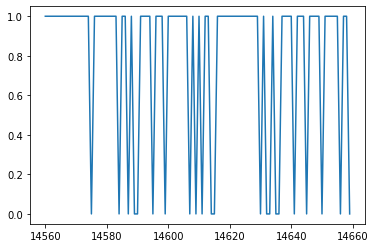

In [115]:
plt.plot(y_test[0:100])
plt.show()

### Test 4

In [116]:
y_test=test4['IS_CRIME']
y_train=train4['IS_CRIME']
X_train=train4[['DISTRICT_ID','PRECINCT_ID']]
X_test=test4[['DISTRICT_ID','PRECINCT_ID']]

lr = Logistic(0.0001)
lr.train(X_train,y_train)
lr_test = lr.use(X_test)
lrs_test = np.argmax(lr_test, 1)
print('Accuracy:', accuracy_score(y_test, lrs_test))
print('F1 score:', f1_score(y_test, lrs_test))

Accuracy: 0.736
F1 score: 0.847926267281106


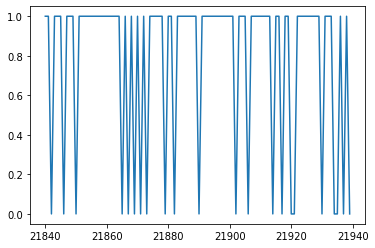

In [117]:
plt.plot(y_test[0:100])
plt.show()

### Test 5

In [118]:
y_test=test5['IS_CRIME']
y_train=train5['IS_CRIME']
X_train=train5[['DISTRICT_ID','PRECINCT_ID']]
X_test=test5[['DISTRICT_ID','PRECINCT_ID']]

lr = Logistic(0.0001)
lr.train(X_train,y_train)
lr_test = lr.use(X_test)
lrs_test = np.argmax(lr_test, 1)
print('Accuracy:', accuracy_score(y_test, lrs_test))
print('F1 score:', f1_score(y_test, lrs_test))

Accuracy: 0.741169305724726
F1 score: 0.851346624693949


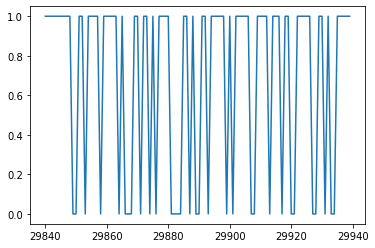

In [119]:
plt.plot(y_test[0:100])
plt.show()

All test have accuracy around 75% with test 1 being highest at 76% by slight margin from other test.

#### Observation

We can see that all the algorithms perform similar even after dividing the dataset into 5 parts this shows that the dataset is pretty evenly distributed. We can see that Logistic regression and LDA give slight difference in their F1 score and accuracies compared to other algorithms.So we can conclude that we can either partition the dataset or use it as a whole for implementing the algorithms it gives a similar performance on the dataset.